In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

classicos = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Problema Real - StepWise\Resultados\algoritmos_classicos.csv')
random_sampling = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Problema Real - StepWise\Resultados\metrics_sampling.csv')
extensoes_ensemble = pd.read_csv(r'H:\Meu Drive\Dissertacao\Notebook\Problema Real - StepWise\Resultados\metrics_extensao_ensemble.csv')

combined_df = pd.concat([classicos, random_sampling, extensoes_ensemble], ignore_index=True)

combined_df['Algoritmo_'] = combined_df['Algoritmo'] + ' - ' + combined_df['Técnica de Sampling'].astype(str)
combined_df

,Algoritmo,Precisão,Recall,F1-Score,ROC AUC,KS,Técnica de Sampling,Imbalance Ratio,Algoritmo_
0,AdaBoost,0.082820,0.653096,0.146662,0.668723,0.267259,NaN,NaN,AdaBoost - nan
1,RandomForest,0.081713,0.630074,0.144657,0.652342,0.256001,NaN,NaN,RandomForest - nan
2,LogisticRegression,0.080799,0.654062,0.141917,0.645641,0.234904,NaN,NaN,LogisticRegression - nan
3,XGBoost,0.074747,0.598366,0.132343,0.635370,0.201460,NaN,NaN,XGBoost - nan
4,Bagging,0.069258,0.524720,0.122365,0.588064,0.152444,NaN,NaN,Bagging - nan
...,...,...,...,...,...,...,...,...,...
86,RUSBoost,0.082317,0.596108,0.144126,0.655159,0.238029,NaN,NaN,RUSBoost - nan
87,OverBoost,0.087737,0.676003,0.153819,0.687986,0.291441,NaN,NaN,OverBoost - nan
88,SMOTEBoost,0.076799,0.703622,0.138460,0.664405,0.256763,NaN,NaN,SMOTEBoost - nan
89,OverBagging,0.072782,0.642095,0.130506,0.635816,0.206594,NaN,NaN,OverBagging - nan


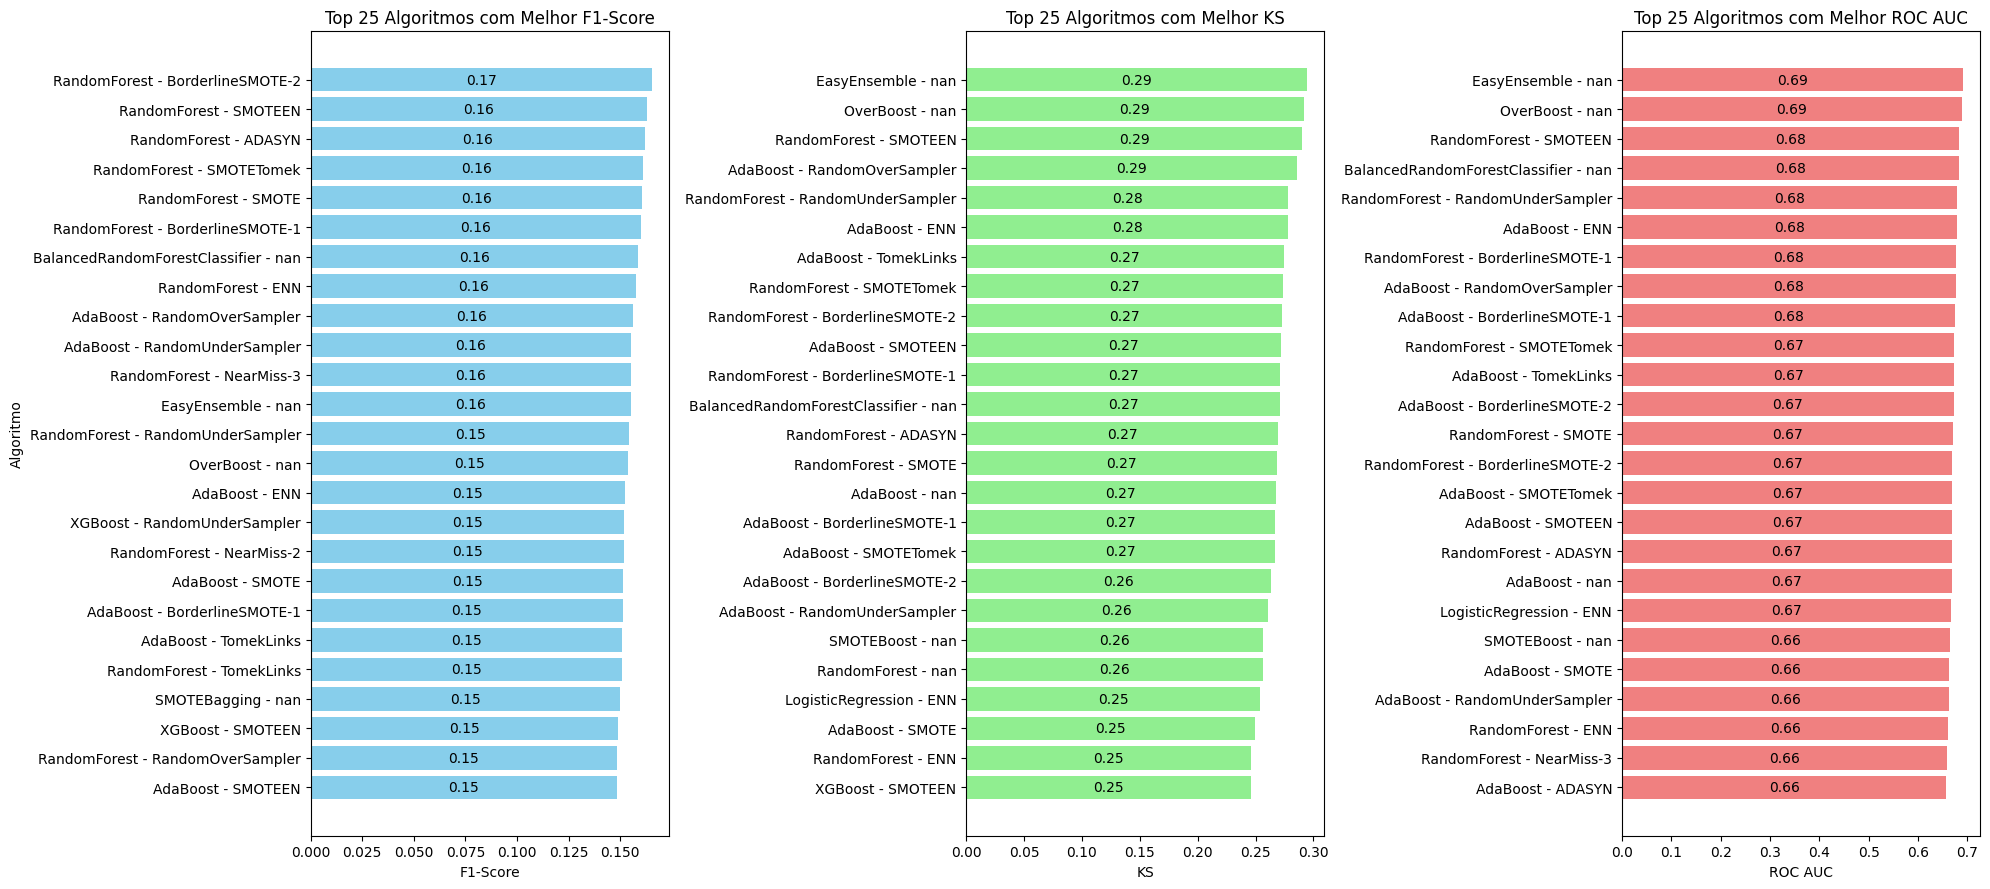

In [3]:
# Selecionar os top 10 algoritmos com base nas métricas F1-Score, KS e ROC AUC
top_10_f1 = combined_df.nlargest(25, 'F1-Score')
top_10_ks = combined_df.nlargest(25, 'KS')
top_10_rocauc = combined_df.nlargest(25, 'ROC AUC')

# Criar a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(20, 9))

# Plotar F1-Score
bars = axes[0].barh(top_10_f1['Algoritmo_'], top_10_f1['F1-Score'], color='skyblue')
axes[0].set_xlabel('F1-Score')
axes[0].set_ylabel('Algoritmo')
axes[0].set_title('Top 25 Algoritmos com Melhor F1-Score')
axes[0].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[0].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Plotar KS
bars = axes[1].barh(top_10_ks['Algoritmo_'], top_10_ks['KS'], color='lightgreen')
axes[1].set_xlabel('KS')
axes[1].set_title('Top 25 Algoritmos com Melhor KS')
axes[1].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[1].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

# Plotar ROC AUC
bars = axes[2].barh(top_10_rocauc['Algoritmo_'], top_10_rocauc['ROC AUC'], color='lightcoral')
axes[2].set_xlabel('ROC AUC')
axes[2].set_title('Top 25 Algoritmos com Melhor ROC AUC')
axes[2].invert_yaxis()

# Adicionar os valores no meio das barras
for bar in bars:
    width = bar.get_width()
    axes[2].text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()